### 포스트 코로나 시대의 경제 상황을 국민연금 가입자 오픈데이터를 통해 알아보자?!!

- 데이터셋: 공공 데이터 포털
- 형태: 파일데이터 (csv)
- 다운로드: https://www.data.go.kr/data/3046071/fileData.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='Arial')
plt.rcParams['figure.figsize'] = (10,7)

pd.set_option('display.float_format', lambda x: '%.2f' %x)

%matplotlib inline

In [2]:
df = pd.read_csv('./data/national-pension-202008.csv', encoding='cp949')

In [3]:
# df.head()

#### Column 정리 (Clean)

In [4]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [5]:
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',]

In [6]:
print("df.columns 열개수:", len(df.columns))
print("columns 열개수:", len(columns))

df.columns 열개수: 22
columns 열개수: 22


In [7]:
df.columns = columns   # df.columns에 새로 정리한 columns을 대입

In [8]:
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,...,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실
0,202007,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0,0
1,202007,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0,0
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,19880101,10101,10101,14,4839540,0,1
3,202007,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0,0
4,202007,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),19880101,10101,10101,496,208935540,0,2


#### 데이터 전처리(정제) : 핵심 데이터 column 추출

In [9]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]   # 특정 변수에 대한 정보를 추출하기 위함

In [10]:
# df.head()
df_main.head()

,사업장명,가입자수,신규,상실,고지금액
0,우성기전(주),5,0,0,792720
1,서능공원묘지운영회(재),13,0,0,3278460
2,노들새마을금고,14,0,1,4839540
3,유창성업(주),28,0,0,5575460
4,희성전자(주),496,0,2,208935540


#### 데이터 분석: 통계 처리

In [11]:
df_main['신규'].mean()

0.8304567228935282

In [12]:
df_main['상실'].mean()

0.6406682860726561

In [13]:
df_main['가입자수'].mean()

19.58097191500251

In [14]:
df_main['고지금액'].mean()

5682724.167521281

#### 월급, 연봉 추정 하기

In [15]:
(df_main['고지금액'] / df_main['가입자수']).head()  # 인당고지금액 계산

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
dtype: float64

In [16]:
# 인당고지금액 열(column) 추가하기
df_main['인당고지금액'] = df_main['고지금액'] / df_main['가입자수']
df_main.head()

,사업장명,가입자수,신규,상실,고지금액,인당고지금액
0,우성기전(주),5,0,0,792720,158544.00
1,서능공원묘지운영회(재),13,0,0,3278460,252189.23
2,노들새마을금고,14,0,1,4839540,345681.43
3,유창성업(주),28,0,0,5575460,199123.57
4,희성전자(주),496,0,2,208935540,421241.01


In [17]:
df['인당고지금액'] = df['고지금액'] / df['가입자수']
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,...,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실,인당고지금액
0,202007,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,292201,동력식 수지 공구 제조업,19880101,10101,10101,5,792720,0,0,158544.00
1,202007,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,701700,화장터 운영 묘지 분양 및 관리업,19880101,10101,10101,13,3278460,0,0,252189.23
2,202007,노들새마을금고,108820,1,6923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,659202,신용조합,19880101,10101,10101,14,4839540,0,1,345681.43
3,202007,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,19880101,10101,10101,28,5575460,0,0,199123.57
4,202007,희성전자(주),106810,1,4410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,701201,비주거용 건물 임대업(점포 자기땅),19880101,10101,10101,496,208935540,0,2,421241.01


In [18]:
df_main['인당고지금액'].head()

0   158544.00
1   252189.23
2   345681.43
3   199123.57
4   421241.01
Name: 인당고지금액, dtype: float64

-------------------------------------------------------------------------------------------------------------------
**국민연금 정보로 어떻게 연봉정보를 계산하나요?**


국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다.

-----------------------
** [수식] **
- 임직원 평균 월급 = 인당고지금액 / 9% * 100%
- 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [19]:
df_main['평균월급'] = df_main['인당고지금액'] / 9 *100
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [20]:
df_main['평균연봉'] = df_main['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [21]:
df_main['평균월급'].notnull().sum()

490078

In [22]:
df['평균월급'].notnull().sum()

490078

#### [부록] matplotlib에서 한글폰트 사용하기

**(1) 버전, 설치위치, 설정위치, 캐시위치 확인하기**

In [23]:
print('matplotlib-버전:', mpl.__version__)
print('설치위치: ', mpl.__file__)
print('설정위치: ', mpl.get_configdir())
print('캐시위치: ', mpl.get_cachedir())

matplotlib-버전: 3.1.3
설치위치:  C:\Anaconda3\envs\cuda-tensorflow\lib\site-packages\matplotlib\__init__.py
설정위치:  C:\Users\user\.matplotlib
캐시위치:  C:\Users\user\.matplotlib


**(2) matplotlib의 위치정보를 알았으니 터미널을 이용해 해당 위치로 간다**

In [24]:
print('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Anaconda3\envs\cuda-tensorflow\lib\site-packages\matplotlib\mpl-data\matplotlibrc


**(3) 설치된 폰트를 찍어봄**

In [25]:
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# print(font_list)
len(font_list)

719

In [26]:
font_list[:10] # 폰트리스트에서 10개만 가져오기

['C:\\WINDOWS\\Fonts\\LBRITED.TTF',
 'C:\\WINDOWS\\Fonts\\msyhbd.ttc',
 'C:\\Windows\\Fonts\\HARLOWSI.TTF',
 'C:\\Windows\\Fonts\\BRLNSDB.TTF',
 'C:\\Windows\\Fonts\\seguili.ttf',
 'C:\\Windows\\Fonts\\LATINWD.TTF',
 'C:\\WINDOWS\\Fonts\\wingding.ttf',
 'C:\\WINDOWS\\Fonts\\CALIST.TTF',
 'C:\\Windows\\Fonts\\LSANSDI.TTF',
 'C:\\Windows\\Fonts\\WINGDNG2.TTF']

In [27]:
f = [f.name for f in fm.fontManager.ttflist]
# print(f)

In [28]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Arial' in f.name]

[('Arial Rounded MT Bold', 'C:\\Windows\\Fonts\\ARLRDBD.TTF'),
 ('Arial', 'C:\\windows\\Fonts\\arialbd.ttf'),
 ('Arial', 'C:\\windows\\Fonts\\ariblk.ttf'),
 ('Arial', 'C:\\Windows\\Fonts\\ariali.ttf'),
 ('Arial', 'C:\\windows\\Fonts\\ARIALNB.TTF'),
 ('Arial', 'C:\\windows\\Fonts\\ARIALNBI.TTF'),
 ('Arial', 'C:\\Windows\\Fonts\\ARIALN.TTF'),
 ('Arial', 'C:\\windows\\Fonts\\arial.ttf'),
 ('Arial', 'C:\\Windows\\Fonts\\arialbi.ttf'),
 ('Arial', 'C:\\Windows\\Fonts\\ARIALNI.TTF')]

#### ------------------------------------------------------------------------------------------------------------------------
#### Seaborn을 사용한 데이터 분포 시각화: (참고: https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)
- 1차원 실수 분포 플롯(Plot):
  (1) rugplot: 러그는 데이터 위치를 x축위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여주는 방법
  (2) kdeplot: 커널밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법
  (3) distplot: 러그와 커널밀도 표시 기능을 동시에 갖고 있어 hist함수보다 많이 사용됨

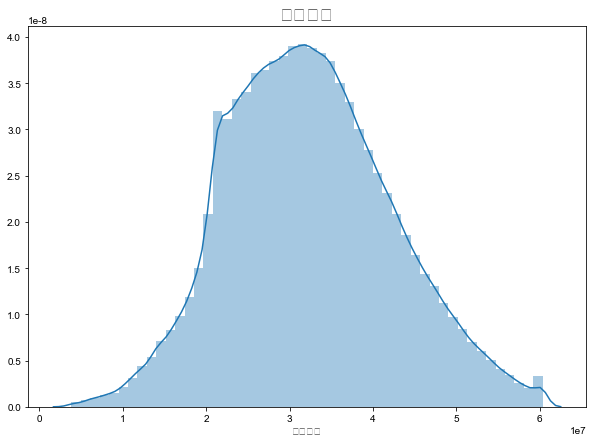

In [32]:
path = 'C:\\windows\\Fonts\\arial.ttf'
fontprop = fm.FontProperties(fname=path, size=18)  # 한글폰트가 여전히 깨지는 문제 질문

plt.figure(figsize=(10,7)) 
sns.distplot(df_main.loc[df_main['평균연봉'].notnull(), '평균연봉'], kde=True, rug=False)  # rug = True 변경시 그래프 표현의 차이에 관한 질문 
plt.title('평균연봉', fontproperties = fontprop)
plt.show()

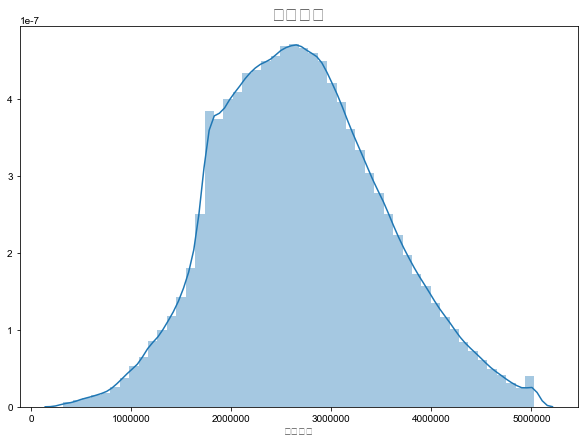

In [33]:
plt.figure(figsize=(10,7)) 
sns.distplot(df_main.loc[df_main['평균월급'].notnull(), '평균월급'], kde=True, rug=False)  # rug = True 변경시 그래프 표현의 차이에 관한 질문 
plt.title('평균연봉', fontproperties = fontprop)
plt.show()

#### 정렬(Order)
- sort_values()
- sort() : 리스트 안의 값에 대한 정렬(기본값: 오름차순 정렬, reverse()함수는 내림차순 정렬)

In [50]:
# 신규 입사자수가 가장 많은 순서대로 
df_main.sort_values(by='가입자수', ascending=False).head(20)   # 가입자수가 적은 순서대로 추출하려면 (가입자수 =0 제외한 데이터 추출하려면)  

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
4634,삼성전자(주),103139,485,538,45835633380,444406.42,4937849.07,59254188.85
3586,현대자동차(주),68010,593,301,30036022820,441641.27,4907125.23,58885502.76
14872,엘지전자(주),40239,395,419,17465807440,434051.73,4822796.97,57873563.59
155649,에스케이하이닉스 주식회사,27812,121,124,12305766780,442462.49,4916249.89,58994998.71
204863,(주)이마트,27366,297,343,6768839680,247344.87,2748276.32,32979315.84
172766,엘지디스플레이(주),26673,52,87,11142632400,417749.50,4641661.11,55699933.27
221358,삼성디스플레이(주),23189,91,125,10191465180,439495.67,4883285.26,58599423.17
3479,주식회사 케이티,22527,15,76,9961182900,442188.61,4913206.82,58958481.82
3529,한국전력공사,22494,34,87,9382844160,417126.53,4634739.22,55616870.63
6561,홈플러스(주),21338,81,227,4869716640,228218.04,2535756.05,30429072.64


In [45]:
# 신규 입사자수가 가장 많은 순서대로 
df_main.sort_values(by='신규', ascending=False).head(20)  

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
485929,인천공항경비주식회사,3477,2752,15,909147360,261474.65,2905273.90,34863286.74
413884,쿠팡풀필먼트서비스 유한회사,8749,2655,2848,432974420,49488.45,549871.63,6598459.56
253925,쿠팡 주식회사,13835,1678,915,3925868620,283763.54,3152928.26,37835139.09
340742,쿠팡풀필먼트서비스 유한회사,14847,1593,1322,3005479000,202430.05,2249222.81,26990673.76
5288,스타벅스커피코리아(주),17087,1279,518,3063022300,179260.39,1991782.12,23901385.46
62951,(주)인터파크,1222,1186,36,364521140,298298.81,3314431.17,39773174.03
514044,솔브레인(주),1151,1151,18,424060500,368427.89,4093643.21,49123718.51
47417,한국맥도날드유한회사(A),8288,1066,886,830463700,100200.74,1113341.51,13360098.13
139505,(주)씨에스원 파트너,1730,1061,73,428084540,247447.71,2749419.01,32993028.13
157341,대원고속(주),2270,911,17,811480180,357480.26,3972002.84,47664034.07


In [49]:
# 상실 입사자수가 가장 많은 순서대로 표시하기
df_main.sort_values(by='상실', ascending=False).head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
413884,쿠팡풀필먼트서비스 유한회사,8749,2655,2848,432974420,49488.45,549871.63,6598459.56
340742,쿠팡풀필먼트서비스 유한회사,14847,1593,1322,3005479000,202430.05,2249222.81,26990673.76
253925,쿠팡 주식회사,13835,1678,915,3925868620,283763.54,3152928.26,37835139.09
47417,한국맥도날드유한회사(A),8288,1066,886,830463700,100200.74,1113341.51,13360098.13
4519,(주)모두투어네트워크,867,240,760,195684780,225703.32,2507814.69,30093776.24
5602,주식회사 유베이스,10074,805,703,1834227240,182075.37,2023059.63,24276715.51
444284,(주)이랜드이츠 압구정지점,4250,134,669,630913000,148450.12,1649445.75,19793349.02
166824,진주시청,1080,69,583,177969640,164786.70,1830963.37,21971560.49
6730,푸르지오서비스(주),555,10,555,161555240,291090.52,3234339.14,38812069.67
4634,삼성전자(주),103139,485,538,45835633380,444406.42,4937849.07,59254188.85


#### 300인 이하 기업
**고급인덱싱 기법: (참고: https://datascienceschool.net/view-notebook/704731b41f794b8ea00768f5b0904512/)
- loc 인덱서: 라벨값 기반의 2차원 인덱싱 (예: df.loc[행 인덱싱값, 열 인덱싱값])
- iloc 인덱서: 순서를 나타내는 정수 기반의 2차원 인덱싱 (예: df.iloc[행(정수순서), 열(정수순서)]
- at 인덱서: 라벨값 기반의 2차원 인덱싱(한개의 스칼라 값만 찾음) (예: df.at["a", "A"])
- iat 인덱서: 순서를 나타내는 정수 기반의 2차원 인덱싱(한개의 스칼라 값만 찾음) (예: df.iat[1,1]) 1행 1열의 값 가져오기

In [52]:
people_limit = 300

In [53]:
small = df_main.loc[(df_main['가입자수'].notnull()) & (df_main['가입자수'] < people_limit)]

In [54]:
small['가입자수'].isnull().sum()

0

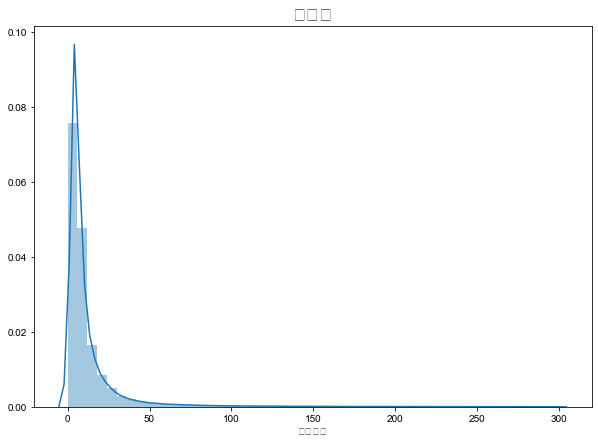

In [55]:
plt.figure(figsize=(10,7))
sns.distplot(small['가입자수'])
plt.title('가입자', fontsize=18)
plt.show()

In [56]:
small.sort_values(by='상실', ascending=False)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
319922,대구시청/교육협력정책관,277,0,277,12089720,43645.20,484946.65,5819359.81
491845,달서구청/일자리지원과 코로나19단기일자리,253,17,253,26676980,105442.61,1171584.54,14059014.49
349665,포항시청(지역공동체사업),253,13,252,35648640,140903.72,1565596.84,18787162.06
36026,서구청 경제과(일자리창출),252,4,246,30881700,122546.43,1361626.98,16339523.81
503301,동구청/경제지원과/방역 및 기타,236,0,236,23220160,98390.51,1093227.87,13118734.46
...,...,...,...,...,...,...,...,...
200413,주식회사백경이엔에스,10,0,0,2408640,240864.00,2676266.67,32115200.00
200412,(주)경기정보통신,5,0,0,1438180,287636.00,3195955.56,38351466.67
200410,（주）남이제약,5,0,0,837160,167432.00,1860355.56,22324266.67
200409,우리숲어린이집,8,0,0,1096320,137040.00,1522666.67,18272000.00
